# Libraries and dataset exportation


In [1]:
#Export the file drug_consumption.data
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
import sys
from sklearn.model_selection import GridSearchCV  


In [2]:
data=pd.read_csv("drug_consumption.data",sep=",",header=None) 

# Observations and data cleaning


## First observations

In [3]:
del data[0]
data.head()

,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
0,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


The columns do not have any names. Let's create them regarding to the subject

In [4]:

data.columns=[
              "Age",
              "Gender",
              "Education level",
              "Country number",
              "Ethnicity number",
              "Neuroticism",
              "Extraversion",
              "Openess to exp",
              "Agreeableness",
              "Conscientiousness",
              "Impulsiveness",
              "Sensation seeing",
              "Alcohol consumption",
              "Amphet consumption",
              "Amyl consumption",
              "Benzos consumption",
              "Caffeine consumption",
              "Cannabis consumption",
              "Chocolate consumption",
              "Coke consumption",
              "Crack consumption",
              "Ecstasy consumption",
              "Heroin consumption",
              "Ketamine consumption",
              "Legal highs consumption",
              "LSD consumption",
              "Meth consumption",
              "Mushrooms consumption",
              "Nicotine consumption",
              "Semeron consumption",
              "VSA consumption"]
data.head()


,Age,Gender,Education level,Country number,Ethnicity number,Neuroticism,Extraversion,Openess to exp,Agreeableness,Conscientiousness,...,Ecstasy consumption,Heroin consumption,Ketamine consumption,Legal highs consumption,LSD consumption,Meth consumption,Mushrooms consumption,Nicotine consumption,Semeron consumption,VSA consumption
0,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [5]:
nb_lignes, nb_col = data.shape
print("Number of row : "+str(nb_lignes))
print("Number of columns "+str(nb_col))


Number of row : 1885
Number of columns 31


In [6]:
data.describe()


,Age,Gender,Education level,Country number,Ethnicity number,Neuroticism,Extraversion,Openess to exp,Agreeableness,Conscientiousness,Impulsiveness,Sensation seeing
count,1885.00000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000
mean,0.03461,-0.000256,-0.003806,0.355542,-0.309577,0.000047,-0.000163,-0.000534,-0.000245,-0.000386,0.007216,-0.003292
std,0.87836,0.482588,0.950078,0.700335,0.166226,0.998106,0.997448,0.996229,0.997440,0.997523,0.954435,0.963701
min,-0.95197,-0.482460,-2.435910,-0.570090,-1.107020,-3.464360,-3.273930,-3.273930,-3.464360,-3.464360,-2.555240,-2.078480
25%,-0.95197,-0.482460,-0.611130,-0.570090,-0.316850,-0.678250,-0.695090,-0.717270,-0.606330,-0.652530,-0.711260,-0.525930
50%,-0.07854,-0.482460,-0.059210,0.960820,-0.316850,0.042570,0.003320,-0.019280,-0.017290,-0.006650,-0.217120,0.079870
75%,0.49788,0.482460,0.454680,0.960820,-0.316850,0.629670,0.637790,0.723300,0.760960,0.584890,0.529750,0.765400
max,2.59171,0.482460,1.984370,0.960820,1.907250,3.273930,3.273930,2.901610,3.464360,3.464360,2.901610,1.921730


In [7]:
data.dtypes


Age                        float64
Gender                     float64
Education level            float64
Country number             float64
Ethnicity number           float64
Neuroticism                float64
Extraversion               float64
Openess to exp             float64
Agreeableness              float64
Conscientiousness          float64
Impulsiveness              float64
Sensation seeing           float64
Alcohol consumption         object
Amphet consumption          object
Amyl consumption            object
Benzos consumption          object
Caffeine consumption        object
Cannabis consumption        object
Chocolate consumption       object
Coke consumption            object
Crack consumption           object
Ecstasy consumption         object
Heroin consumption          object
Ketamine consumption        object
Legal highs consumption     object
LSD consumption             object
Meth consumption            object
Mushrooms consumption       object
Nicotine consumption

In [8]:
data.isna().sum()

Age                        0
Gender                     0
Education level            0
Country number             0
Ethnicity number           0
Neuroticism                0
Extraversion               0
Openess to exp             0
Agreeableness              0
Conscientiousness          0
Impulsiveness              0
Sensation seeing           0
Alcohol consumption        0
Amphet consumption         0
Amyl consumption           0
Benzos consumption         0
Caffeine consumption       0
Cannabis consumption       0
Chocolate consumption      0
Coke consumption           0
Crack consumption          0
Ecstasy consumption        0
Heroin consumption         0
Ketamine consumption       0
Legal highs consumption    0
LSD consumption            0
Meth consumption           0
Mushrooms consumption      0
Nicotine consumption       0
Semeron consumption        0
VSA consumption            0
dtype: int64

There is no row with non available values.

## Improvments of rows values and the column Semeron

To simplify the drug consumption columns, we take off all the "CL" strings to have just integers, corresponding to the level of consumption from 0 to 6.

In [9]:
for i in data.columns[12:32]:
    data[i] = data[i].map({'CL0': 0, 'CL1': 1, 'CL2': 2, 'CL3': 3, 'CL4': 4, 'CL5': 5, 'CL6': 6})


CLi represents the frequency that people consummes a drug, for i between 0 and 6. The bigger i is, the more frequent the consumption:

CL0 Never Used
CL1 Used over a Decade Ago
CL2 Used in Last Decade
CL3 Used in Last Year
CL4 Used in Last Month 
CL5 Used in Last Week
CL6 Used in Last Day

In [10]:
data.head()

,Age,Gender,Education level,Country number,Ethnicity number,Neuroticism,Extraversion,Openess to exp,Agreeableness,Conscientiousness,...,Ecstasy consumption,Heroin consumption,Ketamine consumption,Legal highs consumption,LSD consumption,Meth consumption,Mushrooms consumption,Nicotine consumption,Semeron consumption,VSA consumption
0,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,0,0,0,0,0,0,0,2,0,0
1,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,4,0,2,0,2,3,0,4,0,0
2,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,0,0,0,0,0,0,1,0,0,0
3,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,0,0,2,0,0,0,0,2,0,0
4,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,1,0,0,1,0,0,2,2,0,0


Semeron is a fictive drug created to identify over-claimers thus we take off the persons that recorded a consumption for this drug and then we delete the  Semeron column.

In [11]:
data = data[data["Semeron consumption"] == 0]

In [12]:
nb_lignes, nb_col = data.shape
print("Number of row : "+str(nb_lignes))
print("Number of columns "+str(nb_col))

Number of row : 1877
Number of columns 31


We deleted 8 rows 

In [13]:
data = data.drop(columns="Semeron consumption")
data.head()

,Age,Gender,Education level,Country number,Ethnicity number,Neuroticism,Extraversion,Openess to exp,Agreeableness,Conscientiousness,...,Crack consumption,Ecstasy consumption,Heroin consumption,Ketamine consumption,Legal highs consumption,LSD consumption,Meth consumption,Mushrooms consumption,Nicotine consumption,VSA consumption
0,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,0,0,0,0,0,0,0,0,2,0
1,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,0,4,0,2,0,2,3,0,4,0
2,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,0,0,0,0,0,0,0,1,0,0
3,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,0,0,0,2,0,0,0,0,2,0
4,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,0,1,0,0,1,0,0,2,2,0


## Creation of a new dataset, with string rows

We noticed that have only quantified values for each columns except the drug consumption one. We create a second dataset, data2 that shows directly the string linked to these quantified numbers

In [14]:
data2=data.copy()

In [15]:
for i in data2.columns[1:6]:
      data2[i] = data2[i].map(lambda x: round(x*10**5)/10**5 )

In [16]:
data2['Gender']=data2['Gender'].map(lambda x: "F" if x==0.48246 else "H")
data2['Age']=data2['Age'].map(lambda x:
                              '18-24' if x==-0.95197 else
                              '25-34' if x==-0.07854 else
                              '35-44' if x==0.49788 else
                              '45-54' if x==1.09449 else
                              '55-64' if x==1.82213 else
                              '65+')
data2['Education level']=data2['Education level'].map(lambda x: 'Left school before 16 years' if x==-2.43591 else
                                          ' Left school at 16 years' if x==-1.73790 else
                                          'Left school at 17 years' if x==-1.43719  else
                                          'Left school at 18 years' if x==-1.22751  else
                                          'Some college or university, no certificate or degree' if x==-0.61113 else
                                          'Professional certificate/ diploma' if x==-0.05921 else
                                          'University degree' if x==0.45468 else
                                          'Masters degree' if x==1.16365 else
                                          ' Doctorate degree')




data2['Country number']=data2['Country number'].map(lambda x: 'Australia' if x==-0.09765 else
                                      'Canada' if x==0.24923 else
                                      'New Zealand' if x==-0.46841 else
                                      'Other' if x==-0.28519 else
                                      'Republic of Ireland' if x==0.21128 else
                                      'UK' if x==0.96082 else
                                      'USA')

data2['Ethnicity number']=data2['Ethnicity number'].map(lambda x: 'Asian' if x==-0.50212 else
                                          'Black' if x==-1.10702 else
                                          'Mixed-Black/Asian' if x==1.90725 else
                                          'Mixed-White/Asian' if x==0.12600 else
                                          'Mixed-White/Black' if x==-0.22166 else
                                          'Other' if x==0.11440 else
                                          'White')


In [17]:
data2.head()

,Age,Gender,Education level,Country number,Ethnicity number,Neuroticism,Extraversion,Openess to exp,Agreeableness,Conscientiousness,...,Crack consumption,Ecstasy consumption,Heroin consumption,Ketamine consumption,Legal highs consumption,LSD consumption,Meth consumption,Mushrooms consumption,Nicotine consumption,VSA consumption
0,65+,F,Professional certificate/ diploma,UK,Mixed-White/Asian,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,0,0,0,0,0,0,0,0,2,0
1,25-34,H,Doctorate degree,UK,White,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,0,4,0,2,0,2,3,0,4,0
2,65+,H,Professional certificate/ diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,0,0,0,0,0,0,0,1,0,0
3,65+,F,Masters degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,0,0,0,2,0,0,0,0,2,0
4,65+,F,Doctorate degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,0,1,0,0,1,0,0,2,2,0


# Analysis and Virtualizations

##What we already know

As the percentages for each column are already provided by the database site, there is no need to use graphs to visualize the profile of the people participating in this study.

They are mostly white people (both women and men) from the USA or UK, who are between 18 and 54 years old, most of them entered the university.

Let's look now at their drug consumption

## First graph, the type of drug used according to gender.


In [18]:
drug_names=["Alcohol consumption",
              "Amphet consumption",
              "Amyl consumption",
              "Benzos consumption",
              "Caffeine consumption",
              "Cannabis consumption",
              "Chocolate consumption",
              "Coke consumption",
              "Crack consumption",
              "Ecstasy consumption",
              "Heroin consumption",
              "Ketamine consumption",
              "Legal highs consumption",
              "LSD consumption",
              "Meth consumption",
              "Mushrooms consumption",
              "Nicotine consumption",
              "VSA consumption"]
Summary = pd.pivot_table(data2, index=['Gender'])
s=Summary[drug_names].transpose()
s

Gender,F,H
Alcohol consumption,4.629669,4.645745
Amphet consumption,0.937033,1.737234
Amyl consumption,0.434365,0.778723
Benzos consumption,1.208111,1.714894
Caffeine consumption,5.470651,5.497872
Cannabis consumption,2.282818,3.675532
Chocolate consumption,5.191035,5.028723
Coke consumption,0.882604,1.429787
Crack consumption,0.167556,0.423404
Ecstasy consumption,0.929562,1.688298


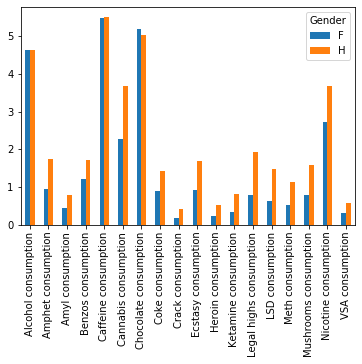

In [19]:
s.plot.bar()


We can cleary see that men are more into drug than girls, exept for legal ones when they are very similar.

## Graph depending on the use frequency

### Frequency of Chocolate consumption

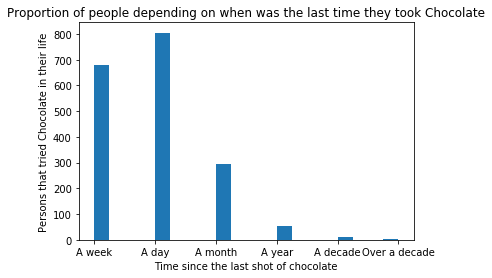

In [20]:
data_choco=data2.copy()
data_choco=data_choco[data_choco["Chocolate consumption"]!=0]
data_choco["Chocolate consumption"] = data_choco["Chocolate consumption"].map({1: "Over a decade", 2: "A decade", 3:"A year",4: "A month",5:"A week",6:"A day"})
bins=20
plt.hist(data_choco["Chocolate consumption"],bins)
plt.ylabel('Persons that tried Chocolate in their life')
plt.xlabel('Time since the last shot of chocolate')
plt.title('Proportion of people depending on when was the last time they took Chocolate')
plt.show()

As we see, most of the respondents ate chocolate just a day ago, or a week ago, when very few of them did not eat it over a year. It is very common to be a consummer of chocolate!

### Frequency of Coke consumption

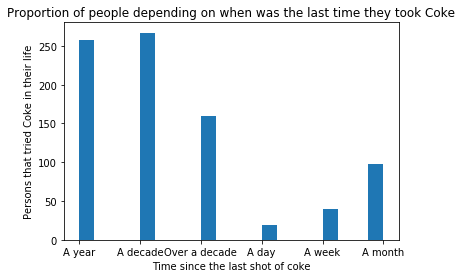

In [21]:
data_coke=data2.copy()
data_coke=data_coke[data_coke["Coke consumption"]!=0]
data_coke["Coke consumption"] = data_coke["Coke consumption"].map({1: "Over a decade", 2: "A decade", 3:"A year",4: "A month",5:"A week",6:"A day"})
bins=20
plt.hist(data_coke["Coke consumption"],bins)
plt.ylabel('Persons that tried Coke in their life')
plt.xlabel('Time since the last shot of coke')
plt.title('Proportion of people depending on when was the last time they took Coke')
plt.show()

The results for Coke is totally different that chocolate : most of the persons took coke over a year a go, when only few of them did it a day or a week ago. We can clearly see that people are less addict to Coke than to chocolate, because Coke is just a passage of their life.

### Correlation between drug use and behavior.


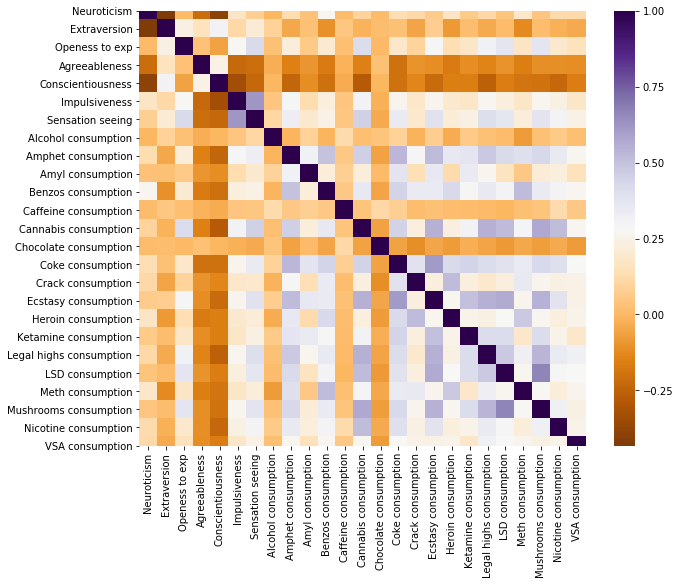

In [22]:
plt.subplots(1, figsize=(10, 8))
corr_matrix=data2.corr()
sn.heatmap(corr_matrix, cmap='PuOr')

We can see that the consumption of chocolate, alcohol or caffeine is not correlated with the consumption of other substances.
Indeed, we show in the last pie graphics that everyone consume them.


## Convertion to a classification problem

From now on, we will split users into two classes: those who have never used the drug in question and those who did it. It means that we take in consideration the CL0 value, corresponding to the Non-Use and CL1, CL2, CL3, CL4, CL5, and CL6 all together showing that the person used the drug at least once in their life.

In [23]:
for i in data2.columns[12:32]:
      data2[i] = data2[i].map(lambda x: 0 if x==0 else 1 )

### Pie chart of the most used drugs






   Alcohol consumption  Amphet consumption  Amyl consumption  \
0                 1844                 904               578   

   Benzos consumption  Caffeine consumption  Cannabis consumption  \
0                 878                  1850                  1464   

   Chocolate consumption  Coke consumption  Crack consumption  \
0                   1845               841                255   

   Ecstasy consumption  Heroin consumption  Ketamine consumption  \
0                  857                 277                   389   

   Legal highs consumption  LSD consumption  Meth consumption  \
0                      785              808               453   

   Mushrooms consumption  Nicotine consumption  VSA consumption  
0                    895                  1449              425  


C:\Users\flofl\Anaconda\lib\site-packages\ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.


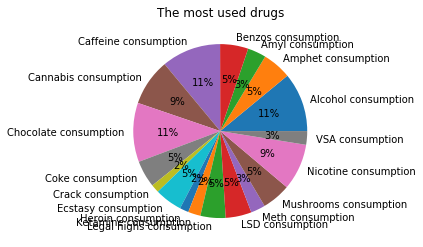

In [24]:
sociology_names=["Age",
              "Gender",
              "Education level",
              "Country number",
              "Ethnicity number","Neuroticism",
              "Extraversion",
              "Openess to exp",
              "Agreeableness",
              "Conscientiousness",
              "Impulsiveness",
              "Sensation seeing"]
#nb_drug is a dictionary that links each drug to number of persons that already used them once
nb_drug={}
for names in drug_names:
  nb_drug[names]=data2[names].sum()

#Convertion in dataframe
nb_drug=[nb_drug]
nb_drug=pd.DataFrame(nb_drug)
print(nb_drug)

#Pie chart
plt.pie(nb_drug,labels=nb_drug.columns,autopct='%1.0f%%')
plt.title('The most used drugs')
plt.show()

The graph is pretty hard to read because most of the drugs have similar proportions. To see more clearly, we take off the legal drugs like chocolate, alcool, caffeine and nicotine.

   Amphet consumption  Amyl consumption  Benzos consumption  \
0                 904               578                 878   

   Cannabis consumption  Coke consumption  Crack consumption  \
0                  1464               841                255   

   Ecstasy consumption  Heroin consumption  Ketamine consumption  \
0                  857                 277                   389   

   Legal highs consumption  LSD consumption  Meth consumption  \
0                      785              808               453   

   Mushrooms consumption  VSA consumption  
0                    895              425  


C:\Users\flofl\Anaconda\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  if __name__ == '__main__':


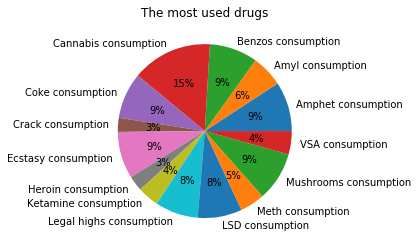

In [25]:
nb_illegal_drugs = nb_drug.copy()
del nb_illegal_drugs["Chocolate consumption"]
del nb_illegal_drugs["Alcohol consumption"]
del nb_illegal_drugs["Nicotine consumption"]
del nb_illegal_drugs["Caffeine consumption"]
print(nb_illegal_drugs)

#Pie chart
plt.pie(nb_illegal_drugs,labels=nb_illegal_drugs.columns,autopct='%1.0f%%')
plt.title('The most used drugs')
plt.show()

We can notice that the Cannabis is the most used drug, then Benzos, Amphet, Ecstazy Mushrooms and Coke

### Comparaison between people that already tried Cannabis and the others

We can compare the personnality score between persons that already tried Cannabis in their life and people that never did it

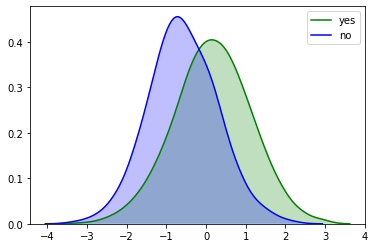

In [26]:
fig, ax = plt.subplots()
data_cannabis=data2.copy()
data_cannabis=data_cannabis[data_cannabis["Cannabis consumption"]==1]

data_noCan=data2.copy()
data_noCan=data_noCan[data_noCan["Cannabis consumption"]==0]

data_openess_Can=data_cannabis["Openess to exp"]
data_openess_NoCan=data_noCan["Openess to exp"]

sn.kdeplot(data_openess_Can,color='green',shade=True, ax=ax)
sn.kdeplot(data_openess_NoCan,color='blue',shade=True, ax=ax)
new_labels = ['Cannabis', 'No Canabis']
plt.legend(new_labels)
plt.show()

The people that already tried Cannabis are more open to experience than the persons that never did it. For the others personnalities, it is quiet the same.

# Modelling

We want to predict if someone may be addict to a chosen drug or not, for all the drugs we saw, depending on his/her sociologic environment and the other drugs he/she is taking.

We built x, that regroup all the parameters, and y, the drug consumption equal to 0 or 1, for each person.

In [27]:
#Set the initial problem to a classification one
for i in data.columns[12:32]:
      data[i] = data[i].map(lambda x: 0 if x==0 else 1 )

### GridSearch for KNN parameters

We want know the best parameters for the different models that we draws thank to the grid search functions.

#### KNN function

In [28]:
def knn_grid_search(df, Y):
    parameters = {"n_neighbors": [2, 3, 5, 8 , 10], 
                  "weights": ['uniform', 'distance'],
                  "algorithm":['auto', 'ball_tree', 'kd_tree', 'brute'], 
                    "leaf_size":[1,3 ]}
    grid=GridSearchCV(KNeighborsClassifier(), parameters, verbose=0, scoring='f1_weighted')
    grid.fit(df, Y)
    try :grid.fit(df, Y)
    except Exception as e : print ("Error : [%s - 2] : %s"%(grid_type,e) ); return -1

    return grid

In [29]:
parameter_knn=['n_neighbors', 'weights', 'algorithm', 'leaf_size']
table_knn=pd.DataFrame()

#Search the best parameters for each drug using the KNN method
for drug in drug_names:
  #The data we want to predict is one column of drug, the rest helps to predict it
  x, y = data.drop(drug, axis=1), data[drug]
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33)
  #Creating the DataFrame to display the result
  knn = knn_grid_search(x_train, y_train)
  param_row=pd.DataFrame([knn.best_params_])
  table_knn=pd.concat([param_row,table_knn])

table_knn.columns=parameter_knn
table_knn.index=drug_names
print(table_knn)

C:\Users\flofl\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\flofl\Anaconda\lib\site-packages\skle

C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classi

C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classi

C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classi

C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classi

C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classi

C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classi

C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classi

C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classi

C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classi

C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classi

C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classi

C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classi

C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classi

C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classi

C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classi

C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classi

C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classi

C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classi

C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classi

C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classi

C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classi

C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classi

C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classi

C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classi

C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classi

C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classi

C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classi

C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\flofl\Anaconda\lib\site-packages\sklearn\metrics\classi

C:\Users\flofl\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\flofl\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\flofl\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\flofl\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureW

                        n_neighbors  weights  algorithm leaf_size
Alcohol consumption            auto        1          5   uniform
Amphet consumption             auto        1          8  distance
Amyl consumption               auto        1         10   uniform
Benzos consumption             auto        1          3   uniform
Caffeine consumption           auto        1          8  distance
Cannabis consumption           auto        1         10  distance
Chocolate consumption          auto        1         10  distance
Coke consumption               auto        1          8  distance
Crack consumption              auto        1         10  distance
Ecstasy consumption            auto        1         10  distance
Heroin consumption             auto        1         10   uniform
Ketamine consumption           auto        1          3   uniform
Legal highs consumption        auto        1          5   uniform
LSD consumption                auto        1          5   uniform
Meth consu

We can see that the best parameters for knn model are: {'algorithm': 'auto', 'leaf_size': 1}

### Creating models and compiling accuracies

We create a function that predicts the testing set for a chosen drug, and returns the table of the accuracies of each model.

In [30]:
def acc_models(to_predict):

  acc_table = []

  # We take in consideration  all the parameters, instead the one we want to predict
  x = data.copy()
  del x[to_predict]
  y = data[to_predict]
  
  # Split the data
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

  # logistic regression model
  lm = LogisticRegression(max_iter=1000)
  lm.fit(x_train,y_train )
  lm_pred = lm.predict(x_test)
  acc_lm = accuracy_score(y_true=y_test, y_pred=lm_pred)
  acc_table = acc_table + [acc_lm]
  # Save the model for the API
  #filename = ""+to_predict+"LogReg.sav"
  #pickle.dump(lm, open(filename, 'wb'))

  # Decision tree model
  tree= DecisionTreeClassifier()
  tree.fit(x_train, y_train)
  tree_pred = tree.predict(x_test)
  acc_tree = accuracy_score(y_test,tree_pred)
  
  # random forest model
  rdm_forest = RandomForestClassifier()
  rdm_forest.fit(x_train, y_train)
  forest_prediction = rdm_forest.predict(x_test)
  acc_rdm_forest = accuracy_score(y_test, forest_prediction)

  # boosting model
  boosting_model = GradientBoostingClassifier()
  boosting_model.fit(x_train, y_train)
  boosting_prediction = boosting_model.predict(x_test)
  acc_boosting=accuracy_score(y_test, boosting_prediction)

  # k-Nearest Neighbor model 
  # We reuse the best parameters found in thank to the GridSearch method
  knn_model = KNeighborsClassifier(algorithm= 'auto', leaf_size= 1)
  knn_model.fit(x_train, y_train)
  knn_prediction = knn_model.predict(x_test)
  acc_knn = accuracy_score(y_test, knn_prediction)

  # neural network model

  neural_network_model = MLPClassifier()
  neural_network_model.fit(x_train,y_train)
  neural_network_prediction=neural_network_model.predict(x_test)
  acc_neural_network_model = accuracy_score(y_test, neural_network_prediction)

  acc_table = acc_table + [acc_tree] +[acc_rdm_forest,acc_boosting,acc_knn,acc_neural_network_model]

  return acc_table



### Comparing accuracies

In [31]:
model_names=["Logisitc reg","Decision tree", "Random forest", "Boosting", "KNN", "Neural network"]
final_table=pd.DataFrame()

for drug in drug_names:
  acc_table = acc_models(drug)
  #Add a line to the DataFrame
  row_acc=pd.DataFrame([acc_table],index=[drug])
  final_table=pd.concat([row_acc,final_table])

final_table.columns=model_names

final_table

C:\Users\flofl\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\flofl\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\flofl\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\flofl\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\flofl\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value o

C:\Users\flofl\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\flofl\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\flofl\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\flofl\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\flofl\Anaconda\lib\site-packages\sklearn\linear_mode

,Logisitc reg,Decision tree,Random forest,Boosting,KNN,Neural network
VSA consumption,0.787097,0.730645,0.774194,0.800000,0.745161,0.774194
Nicotine consumption,0.816129,0.770968,0.804839,0.816129,0.770968,0.796774
Mushrooms consumption,0.837097,0.785484,0.822581,0.830645,0.814516,0.809677
Meth consumption,0.819355,0.758065,0.812903,0.824194,0.782258,0.808065
LSD consumption,0.851613,0.790323,0.809677,0.843548,0.819355,0.851613
Legal highs consumption,0.798387,0.740323,0.787097,0.785484,0.770968,0.783871
Ketamine consumption,0.838710,0.772581,0.819355,0.841935,0.804839,0.822581
Heroin consumption,0.904839,0.843548,0.911290,0.904839,0.888710,0.900000
Ecstasy consumption,0.850000,0.801613,0.845161,0.851613,0.819355,0.840323
Crack consumption,0.888710,0.829032,0.874194,0.893548,0.864516,0.866129


#### Average accuracy per model

Logisitc reg      0.860484
Decision tree     0.806452
Random forest     0.848208
Boosting          0.859498
KNN               0.832616
Neural network    0.849462
dtype: float64


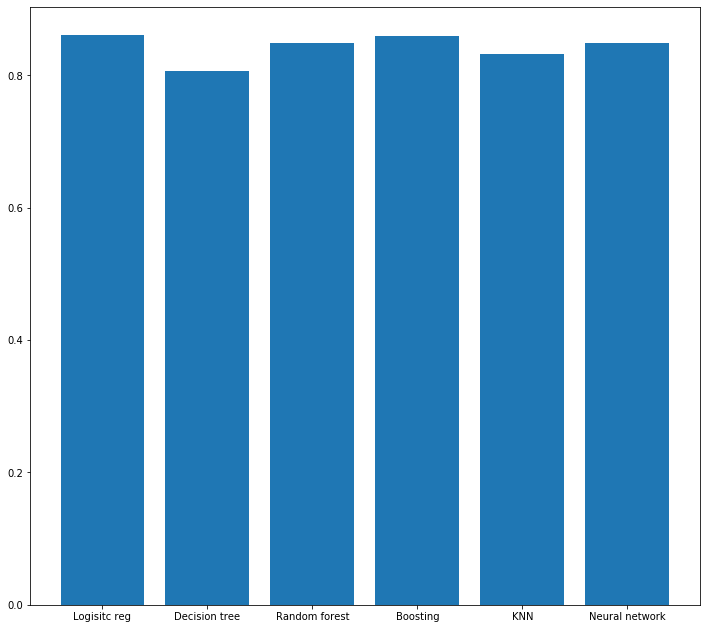

In [32]:
#Compile the average accuracy of each model for all the drugs
avg_acc=final_table.mean(axis=0)
print(avg_acc)
plt.figure(figsize=(12,11))
plt.bar(model_names,avg_acc)
plt.show()

The Logistic regression model is in average the best one, very close to the Random forest and the Boosting one.


#### Average accuracy per drug

VSA consumption            0.768548
Nicotine consumption       0.795968
Mushrooms consumption      0.816667
Meth consumption           0.800806
LSD consumption            0.827688
Legal highs consumption    0.777688
Ketamine consumption       0.816667
Heroin consumption         0.892204
Ecstasy consumption        0.834677
Crack consumption          0.869355
Coke consumption           0.822043
Chocolate consumption      0.983871
Cannabis consumption       0.865323
Caffeine consumption       0.976344
Benzos consumption         0.736290
Amyl consumption           0.792204
Amphet consumption         0.814516
Alcohol consumption        0.979301
dtype: float64


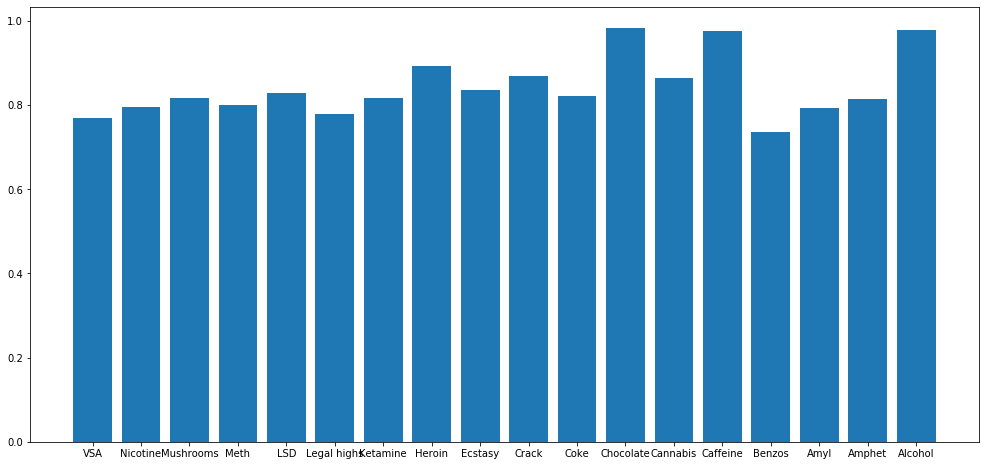

In [33]:
#Names without "consumption"
short_drug_names=["Alcohol",
              "Amphet",
              "Amyl",
              "Benzos",
              "Caffeine",
              "Cannabis",
              "Chocolate",
              "Coke",
              "Crack",
              "Ecstasy",
              "Heroin",
              "Ketamine",
              "Legal highs",
              "LSD",
              "Meth",
              "Mushrooms",
              "Nicotine",
              "VSA"]
short_drug_names.reverse()

#Average accuracies per drug for all models
avg_acc2=final_table.mean(axis=1)
print(avg_acc2)
plt.figure(figsize=(17,8))
plt.bar(short_drug_names,avg_acc2)
plt.show()

We can see that the easiest drugs to predict are Caffeine, Chocolate and Alcohol, that are by the way the most used one.

But, after them we can find Heroin and Cannabis and then Crack (Heroin and Crack are the one that are used the less)

Thus we understand than the easiest drugs to predict are the one that are either the most or the least used.

#### Best model for the easiest drug to predict

In [34]:
caffeine_acc=final_table[final_table.index=="Caffeine consumption"]
caffeine_acc


,Logisitc reg,Decision tree,Random forest,Boosting,KNN,Neural network
Caffeine consumption,0.977419,0.967742,0.979032,0.979032,0.979032,0.975806
